# __Imports__

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
from itertools import product

# __Data Transformations__

In [2]:
X_cat = pd.read_csv('../data/processed/X_cat.csv', index_col=0)
X_num = pd.read_csv('../data/processed/X_num.csv', index_col=0)
y = pd.read_csv('../data/processed/y.csv', index_col=0)

In [3]:
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns)
X = pd.concat([X_num_scaled, X_cat], axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# __Models__

## __No Clustering Models__

### __CatBoost__

### __Train and Test__

In [5]:
param_grid = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

param_combinations = list(product(
    param_grid['iterations'],
    param_grid['learning_rate'],
    param_grid['depth'],
    param_grid['l2_leaf_reg']
))

best_score = float('inf')
best_params = None

for params in param_combinations:
    iterations, learning_rate, depth, l2_leaf_reg = params
    print('TRAINING STARTED.')
    print(f"Parameters: iterations={iterations}, learning_rate={learning_rate}, depth={depth}, l2_leaf_reg={l2_leaf_reg}")
    
    model = CatBoostRegressor(
        iterations=iterations,
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        logging_level='Silent'
    )
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    score = mean_squared_error(y_test, y_pred)
    print(f"TRAINING FINISHED.")
    print()
    
    if score < best_score:
        best_score = score
        best_params = params

print(f"Best parameters: iterations={best_params[0]}, learning_rate={best_params[1]}, depth={best_params[2]}, l2_leaf_reg={best_params[3]}")
print(f"Best MSE: {best_score}")

TRAINING STARTED.
Parameters: iterations=100, learning_rate=0.01, depth=4, l2_leaf_reg=1
TRAINING FINISHED.
TRAINING STARTED.
Parameters: iterations=100, learning_rate=0.01, depth=4, l2_leaf_reg=3
TRAINING FINISHED.
TRAINING STARTED.
Parameters: iterations=100, learning_rate=0.01, depth=4, l2_leaf_reg=5
TRAINING FINISHED.
TRAINING STARTED.
Parameters: iterations=100, learning_rate=0.01, depth=6, l2_leaf_reg=1
TRAINING FINISHED.
TRAINING STARTED.
Parameters: iterations=100, learning_rate=0.01, depth=6, l2_leaf_reg=3
TRAINING FINISHED.
TRAINING STARTED.
Parameters: iterations=100, learning_rate=0.01, depth=6, l2_leaf_reg=5
TRAINING FINISHED.
TRAINING STARTED.
Parameters: iterations=100, learning_rate=0.01, depth=8, l2_leaf_reg=1
TRAINING FINISHED.
TRAINING STARTED.
Parameters: iterations=100, learning_rate=0.01, depth=8, l2_leaf_reg=3


KeyboardInterrupt: 

## __Clustering Models__

### __Clustering with K-means ++__

In [ ]:
kmeans_predictions = pd.DataFrame()
kmeans_plus_predictions = pd.DataFrame()

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_train)
    wcss.append(kmeans.inertia_)
    kmeans_predictions[f'Labels_{i}_clusters'] = labels


wcss_plus = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_train)
    wcss_plus.append(kmeans.inertia_)
    kmeans_plus_predictions[f'Labels_{i}_clusters'] = labels

kmeans_predictions.to_csv('../models/kmeans_predictions.csv')
kmeans_plus_predictions.to_csv('../models/kmeans_plus_predictions.csv')

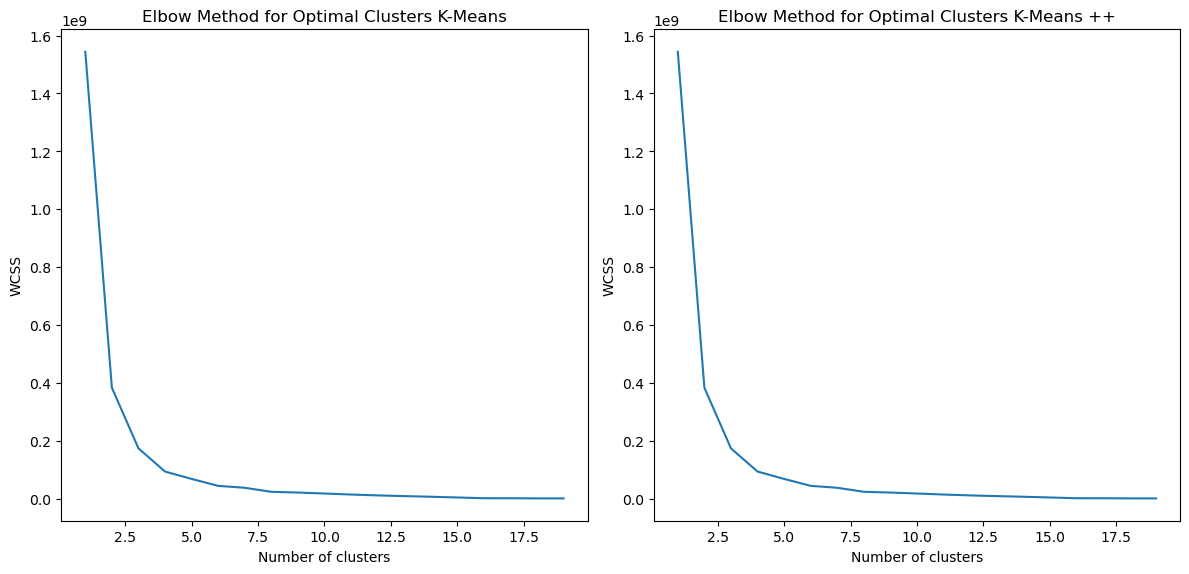

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(range(1, 20), wcss)
axs[0].set_xlabel('Number of clusters')
axs[0].set_ylabel('WCSS')
axs[0].set_title('Elbow Method for Optimal Clusters K-Means')

axs[1].plot(range(1, 20), wcss_plus)
axs[1].set_xlabel('Number of clusters')
axs[1].set_ylabel('WCSS')
axs[1].set_title('Elbow Method for Optimal Clusters K-Means ++')

plt.tight_layout()
plt.show()

In [ ]:
wcss[2] < wcss_plus[2]

False

Use 5 clusters with k-means ++ because it has less intertia.